# Health Insurance Premium Prediction

The given data set contains a person's medical history in the form of whether they have a specific condition or not, their age, height, weight, etc along with the premium they have to pay for insurance. We analyse what factors play an important role in determining the premium of the person.

In [26]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
df=pd.read_csv('medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,no,no,no,no,155,57,no,no,0,25000
1,60,yes,no,no,no,180,73,no,no,0,29000
2,36,yes,yes,no,no,158,59,no,no,1,23000
3,52,yes,yes,no,yes,183,93,no,no,2,28000
4,38,no,no,no,yes,166,88,no,no,1,23000


In [28]:
df.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,no,no,no,no,169,67,no,no,0,15000
982,64,yes,yes,no,no,153,70,no,no,3,28000
983,56,no,yes,no,no,155,71,no,no,1,29000
984,47,yes,yes,no,no,158,73,yes,no,1,39000
985,21,no,no,no,no,158,75,yes,no,1,15000


In [29]:
df.shape

(986, 11)

There are 986 rows and 11 columns in the dataset.

In [30]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    int64 
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 84.9+ KB


Data type of Age,Height,Weight,NumberOfMajorSurgeries are integer while others are object type.

In [32]:
#Checking null values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

There is no null values in any column.

In [33]:
#Checking for duplicate values
dup=df.duplicated()
print("number of duplicate records",dup.sum())

number of duplicate records 0


In [34]:
df.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

In [35]:
#Seperating categorical and numerical variables
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)


In [36]:
df.describe()

,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,0.667343,24336.713996
std,13.963371,10.098155,14.265096,0.749205,6248.184382
min,18.000000,145.000000,51.000000,0.000000,15000.000000
25%,30.000000,161.000000,67.000000,0.000000,21000.000000
50%,42.000000,168.000000,75.000000,1.000000,23000.000000
75%,53.000000,176.000000,87.000000,1.000000,28000.000000
max,66.000000,188.000000,132.000000,3.000000,40000.000000


Age of the people ranges from 18 to 66 where average age is 42.
Minimum height is145 and maximum is 188 where average height is 168.
The weights ranges from 51 to132 where average is75.
The Premium prices ranges from 15000 to 40000.

In [37]:
for i in df[cat]:
    print(i ,df[i].nunique())
    print(df[i].value_counts())

Diabetes 2
no     572
yes    414
Name: Diabetes, dtype: int64
BloodPressureProblems 2
no     524
yes    462
Name: BloodPressureProblems, dtype: int64
AnyTransplants 2
no     938
yes     48
Name: AnyTransplants, dtype: int64
AnyChronicDiseases 2
no     807
yes    179
Name: AnyChronicDiseases, dtype: int64
KnownAllergies 2
no     776
yes    210
Name: KnownAllergies, dtype: int64
HistoryOfCancerInFamily 2
no     868
yes    118
Name: HistoryOfCancerInFamily, dtype: int64


# Exploritory Data Analysis

C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ATHULYA\anaconda

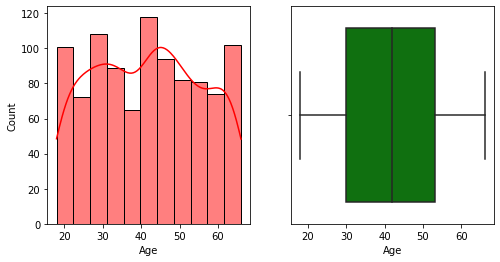

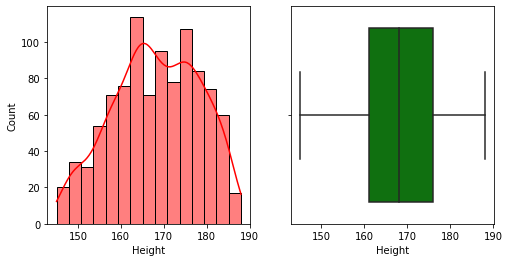

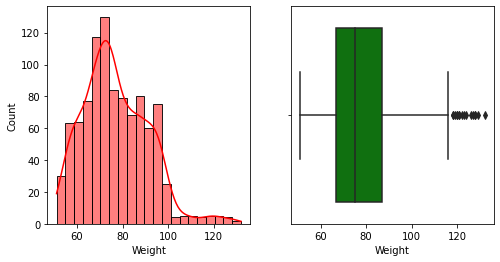

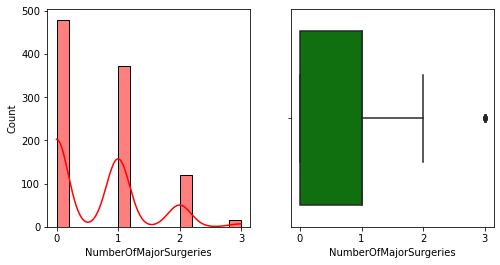

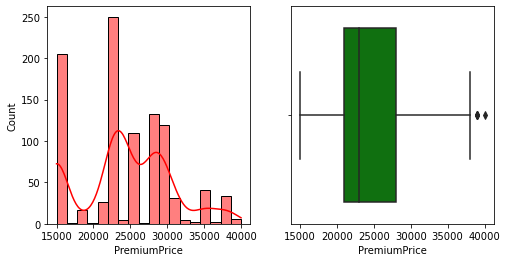

In [38]:
#Checking for outliers
for i in df[num]:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(df[i],kde=True,ax=axes[0],color='red')
    sns.boxplot(df[i],ax=axes[1],color='green')

There are outliers present in the dataset.

C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ATHULYA\anaconda

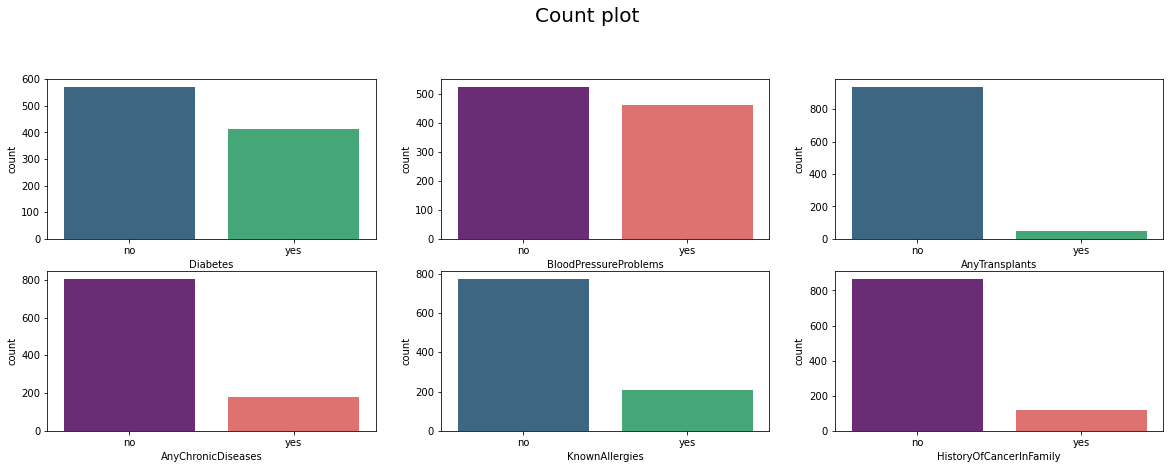

In [39]:
# Checking counts

plt.figure(figsize=(20,10))
plt.subplot(331)
sns.countplot(df['Diabetes'],palette='viridis')

plt.subplot(332)
sns.countplot(df['BloodPressureProblems'],palette='magma')

plt.subplot(333)
sns.countplot(df['AnyTransplants'],palette='viridis')

plt.subplot(334)
sns.countplot(df['AnyChronicDiseases'],palette='magma')

plt.subplot(335)
sns.countplot(df['KnownAllergies'],palette='viridis')

plt.subplot(336)
sns.countplot(df['HistoryOfCancerInFamily'],palette='magma')


plt.suptitle('Count plot',fontsize = 20)
plt.show()


Most of the people in this dataset are non diabetic.
The number of people having blood pressure problems is lessthan the number of people having blood pressure problems.
Only few number of people undergone transplantation.
Most of the people donot have any chronic diseases.
People having any allergies are less than non-allergic.
Only few people have cancer patients in their family.
Most of the people donot undergone any surgeries.People who had 3 surgeries are very low in number.


C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


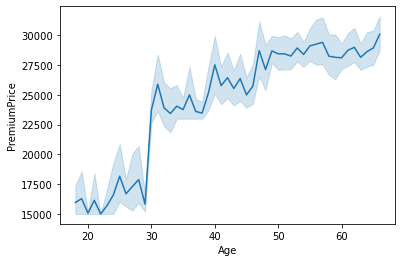

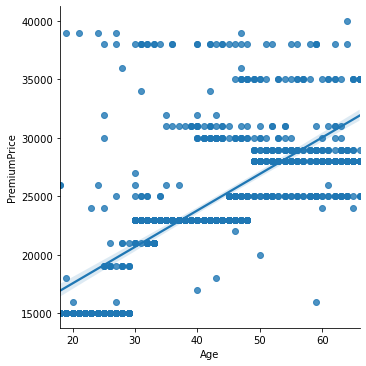

In [40]:
#Relation between Age and Premium Price
sns.lineplot(df['Age'],df['PremiumPrice'])
sns.lmplot(x='Age', y ='PremiumPrice',data=df)

As age increases premium price also increases.

C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


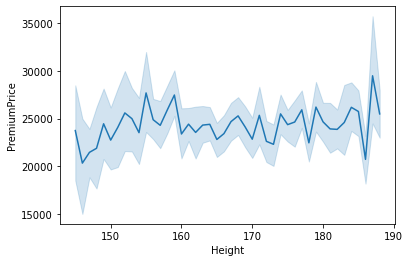

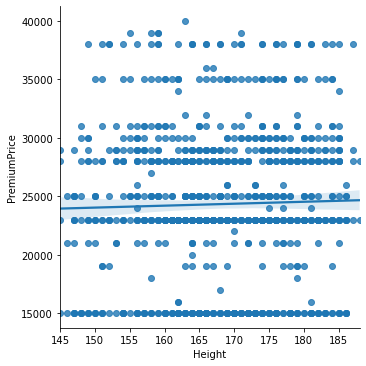

In [41]:
#Relation between Height and Premium Price
sns.lineplot(df['Height'],df['PremiumPrice'])
sns.lmplot(x='Height', y ='PremiumPrice',data=df)

We cannot say the height and premium price is much related.Very little relation can be seen.

C:\Users\ATHULYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


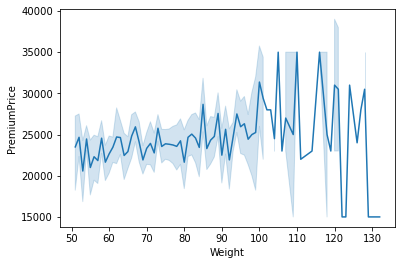

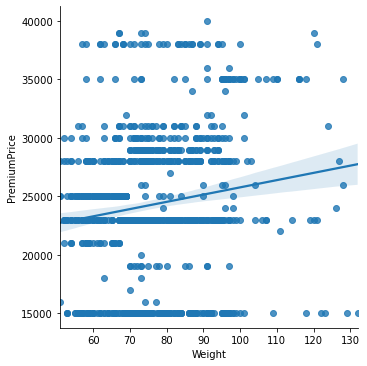

In [42]:
#Relation between Weight and Premium Price
sns.lineplot(df['Weight'],df['PremiumPrice'])
sns.lmplot(x='Weight', y ='PremiumPrice',data=df)

We observe some users with lot of weight pay high premium but also there are Users with lot of weight but are paying less premium.We can say that there is some positive relation between the Premium Price and Weight.  

<AxesSubplot:xlabel='Diabetes', ylabel='PremiumPrice'>

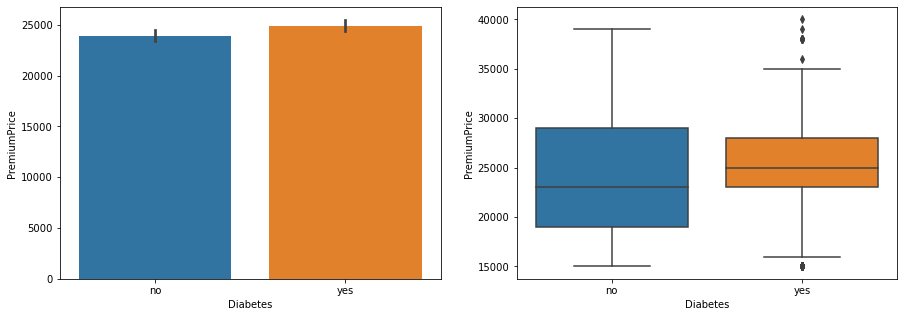

In [43]:
#Relation between Diabetes and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='Diabetes',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='Diabetes',y='PremiumPrice',ax=ax[1])

We Observe that median Premium Price for people with Diabetes is Higher than people without Diabetes But, There are also people without Diabetes pay much Higher Premium.

<AxesSubplot:xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

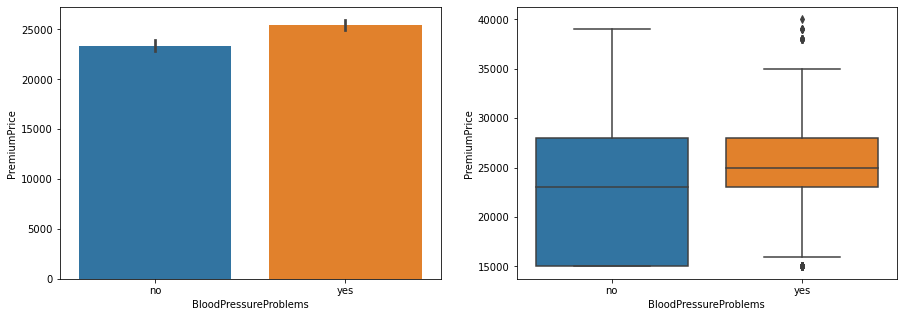

In [44]:
#Relation between BloodPressureProblems and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='BloodPressureProblems',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='BloodPressureProblems',y='PremiumPrice',ax=ax[1])

We Observe that median Premium Price for people with Diabetes is Higher than people without Diabetes But, There are also people without Diabetes pay much Higher Premium.

<AxesSubplot:xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

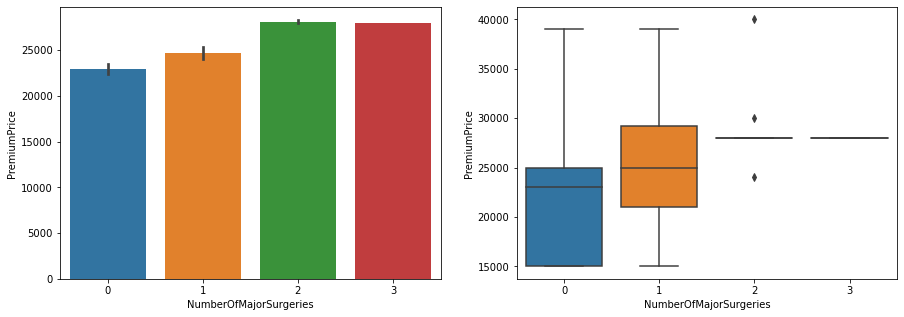

In [45]:
#Relation between Number Of Major Surgeries and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='NumberOfMajorSurgeries',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='NumberOfMajorSurgeries',y='PremiumPrice',ax=ax[1])

As number of surgeries increases premium price also increases.

<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

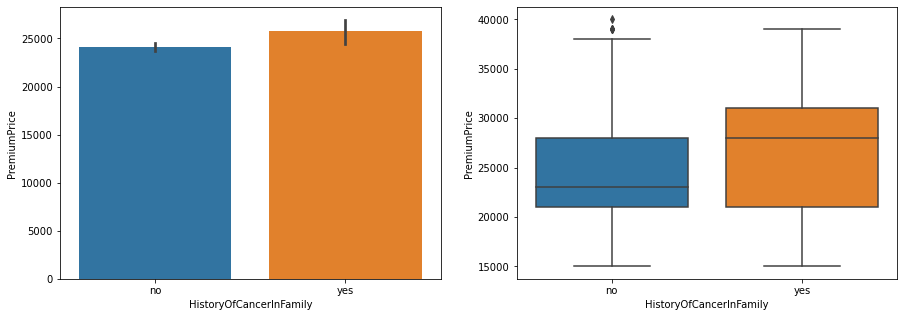

In [46]:
#Relation between HistoryOfCancerInFamily and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='HistoryOfCancerInFamily',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='HistoryOfCancerInFamily',y='PremiumPrice',ax=ax[1])

People with history of cancer in the family tends to pay more than the people who are not

<AxesSubplot:xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

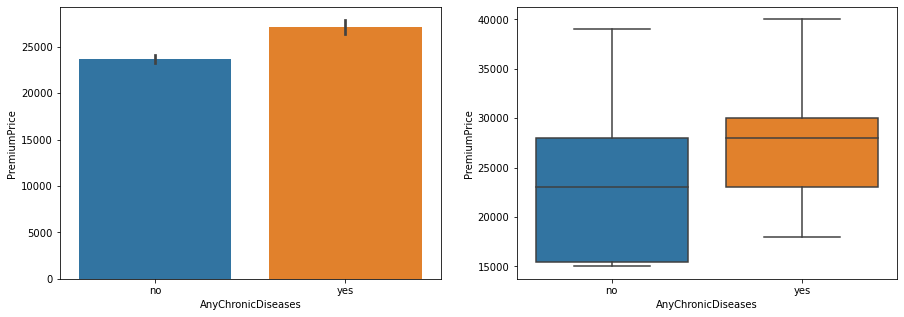

In [47]:
#Relation between Any Chronic Diseases and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='AnyChronicDiseases',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='AnyChronicDiseases',y='PremiumPrice',ax=ax[1])

<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

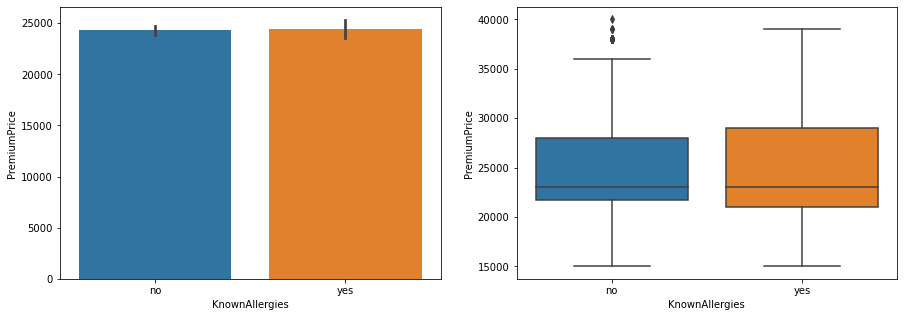

In [48]:
#Relation between Known Allergies and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='KnownAllergies',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='KnownAllergies',y='PremiumPrice',ax=ax[1])

There is not Much difference in the Premium Price with respect to Users with Known Allergies or NO Allergies.

<AxesSubplot:xlabel='AnyTransplants', ylabel='PremiumPrice'>

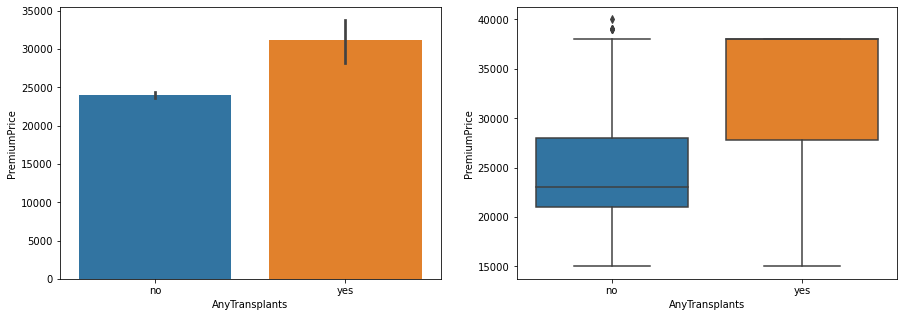

In [49]:
#Relation between Any Transplants and Premium Price
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='AnyTransplants',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='AnyTransplants',y='PremiumPrice',ax=ax[1])

People with Transplant Pay Higer Premium Price.

In [50]:
#handling categorical data
cols=['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']

In [51]:
for col in cols:
    df[col]=pd.get_dummies(df[col],drop_first=True)

In [52]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


<AxesSubplot:>

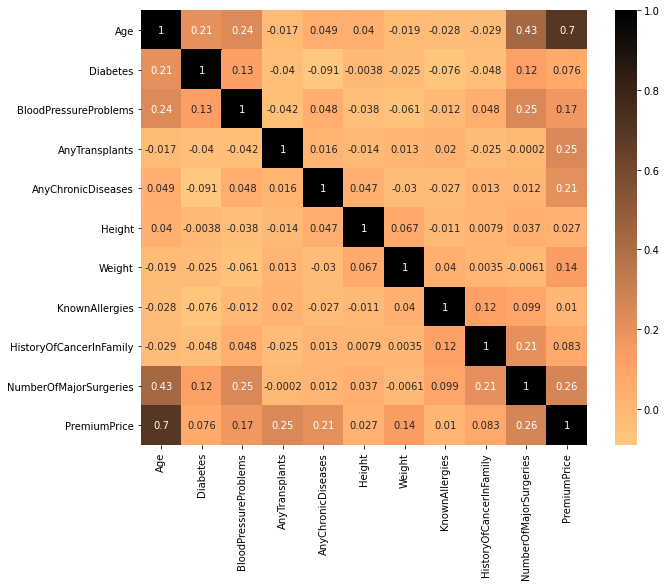

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='copper_r')

From the above heatmap, we see that there is a high correlation between Age of a person and Premium paid by him.

We can also see good correlation between Number of major Surgeries to Age, and to Blood Pressure problems.

Also there are good corrlation between Premium price to Any Transplant, Number of Major Surgeries, Any Chronic Disease.

In [54]:
x=df.drop('PremiumPrice',axis=1)
y=df.PremiumPrice

In [80]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=40)

In [81]:
xtrain.shape

(690, 10)

In [82]:
ytrain.shape

(690,)

In [83]:
xtest.shape

(296, 10)

In [84]:
ytest.shape

(296,)

In [85]:
xtrain.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
886,52,0,0,0,0,170,66,0,0,0
385,54,1,1,0,0,174,91,0,0,0
129,19,1,0,0,0,185,62,0,0,1
532,49,0,0,0,0,178,81,1,0,1
794,33,0,1,0,0,154,82,0,0,0


In [86]:
ytest.head()

891    23000
447    28000
484    25000
217    24000
936    15000
Name: PremiumPrice, dtype: int64

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

In [88]:
svc_scores=cross_val_score(SVC(),x,y)
lin_scores=cross_val_score(LinearRegression(),x,y)
rf_scores=cross_val_score(RandomForestRegressor(),x,y)
print(svc_scores)
print(lin_scores)
print(rf_scores)

C:\Users\ATHULYA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.55555556 0.54822335 0.57360406 0.59898477 0.5177665 ]
[0.63240101 0.58457062 0.62227226 0.74347676 0.49176311]
[0.82293942 0.68778731 0.79726984 0.89807751 0.68697775]


In [89]:
#model training
model=RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [90]:
model.score(xtest,ytest)

0.7168086806159633

In [95]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param={'n_estimators': [10,50,100,200]}
grid=GridSearchCV(model,param,cv=5,return_train_score=True)

#fitting the model for grid search
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [96]:
grid.cv_results_

{'mean_fit_time': array([0.02106891, 0.05650158, 0.10317883, 0.23064475]),
 'std_fit_time': array([0.00999124, 0.00788566, 0.00718082, 0.00720781]),
 'mean_score_time': array([0.        , 0.00312676, 0.00786376, 0.00319667]),
 'std_score_time': array([0.        , 0.00625353, 0.00698532, 0.00639334]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.86863528, 0.89426538, 0.88751563, 0.88871449]),
 'split1_test_score': array([0.79216674, 0.81180889, 0.81379998, 0.82656577]),
 'split2_test_score': array([0.60962911, 0.61092321, 0.61401166, 0.61273153]),
 'split3_test_score': array([0.8138743 , 0.82221748, 0.81138738, 0.81989596]),
 'split4_test_score': array([0.70434279, 0.69616098, 0.68852834, 0.69944574]),
 'mean_test_score': array([0.757

In [97]:
data=pd.DataFrame(grid.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021069,0.009991,0.000000,0.000000,10,{'n_estimators': 10},0.868635,0.792167,0.609629,0.813874,...,0.757730,0.091019,4,0.943666,0.955294,0.971570,0.960727,0.957977,0.957847,0.008992
1,0.056502,0.007886,0.003127,0.006254,50,{'n_estimators': 50},0.894265,0.811809,0.610923,0.822217,...,0.767075,0.100629,2,0.961576,0.964525,0.977984,0.970170,0.972300,0.969311,0.005790
2,0.103179,0.007181,0.007864,0.006985,100,{'n_estimators': 100},0.887516,0.813800,0.614012,0.811387,...,0.763049,0.098153,3,0.964350,0.963989,0.976133,0.969730,0.971555,0.969151,0.004573
3,0.230645,0.007208,0.003197,0.006393,200,{'n_estimators': 200},0.888714,0.826566,0.612732,0.819896,...,0.769471,0.099491,1,0.965074,0.965817,0.977631,0.971010,0.971784,0.970263,0.004557


In [98]:
grid.best_params_

{'n_estimators': 200}

In [99]:
#save model
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)